In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
from geopy.distance import geodesic
import re
import openpyxl
from openpyxl import load_workbook
import datetime
import statsmodels.api as sm
import requests
from geopy.distance import distance
from datetime import datetime, timedelta

In [ ]:
import pandoc

In [ ]:
## 根据店铺名称确认经纬度
## 读取o2o店铺文件

# 打开Excel文件
wb = openpyxl.load_workbook('/Users/lesliedeng/Desktop/毕设/rawdata/昆明O2O.xlsx')

# 选择Sheet表
sheet = wb['昆明门店开通O2O时间'] 

# 提取创建时间列数据
time = sheet['a']
# 提取门店列数据
column = sheet['b']
# 提取店编
sapcolumn = sheet['c']
 
# 创建空列表
data = []
timecode=[]

# 迭代column对象,将单元格数据添加到列表中
for cell in column[1:]:
    data.append(cell.value)
for cell in time[1:]:
    timecode.append(cell.value)
sap = [cell.value for cell in sapcolumn[1:]]
    
# data现在是第3列所有单元格数据的列表    
print(data)

In [ ]:
import requests

# 百度地图API密钥
ak = 'Kadu7cjY7eFAofC5zi5EOaYWR9GDv8LC' 

# 空列表设置
longitude_list = []
latitude_list = []
comprehension_list = []
confidence_list = []

for shop_name in data:

    # 构建请求URL
    url = f'https://api.map.baidu.com/geocoding/v3/?address={shop_name}&output=json&ak={ak}'

    # 发送请求并获取响应
    response = requests.get(url)
    data = response.json()

    # 从响应中提取经纬度
    location = data['result']['location']
    lng = location['lng']     # 经度
    lat = location['lat']     # 纬度
    comprehension = data['result']['comprehension'] #理解度
    confidence = data['result']['confidence'] #绝对精度 https://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding

    
    # 将经纬度数据添加到列表中
    longitude_list.append(lng)
    latitude_list.append(lat)
    comprehension_list.append(comprehension)
    confidence_list.append(confidence)

In [ ]:
####高德地图版本
#import requests

#def get_location_by_name(name, city=None):
#    url = 'https://restapi.amap.com/v3/place/text'
#     params = {'key': 'd59cea0731fa323798939f011e9be2bc',
#               'keywords': name,
#               'city': city}
#     response = requests.get(url, params=params)
#     data = response.json()
#     if data['count'] == '0':
#         return None
#     location = data['pois'][0]['location'].split(',')
#     return float(location[0]), float(location[1])


In [ ]:
# 空列表设置
addresscode = pd.DataFrame()

# 循环遍历经纬度数据，并将它们添加到 DataFrame 中
for i in range(len(longitude_list)):
    addresscode.loc[i, 'longitude'] = longitude_list[i]
    addresscode.loc[i, 'latitude'] = latitude_list[i]
    addresscode.loc[i, 'comprehension'] = comprehension_list[i]
    addresscode.loc[i, 'confidence'] = confidence_list[i]
    addresscode.loc[i, 'time'] = timecode[i]
    addresscode.loc[i, 'sap'] = sap[i]
    
addresscode.to_excel('addresscode.xlsx', index=False)

In [ ]:
#####################################

In [ ]:
#文件切割

# 读取原始 Excel 文件
df = pd.read_excel('/Users/lesliedeng/Desktop/毕设/昆明天猫.xlsx')

# 每个子文件的行数
chunk_size = 4000

# 计算子文件数量
num_chunks = (df.shape[0] - 1) // chunk_size + 1

# 将数据拆分为多个子 DataFrame，每个子 DataFrame 包含指定数量的行
for i in range(num_chunks):
    start = i * chunk_size
    end = min(start + chunk_size, df.shape[0])
    chunk = df.iloc[start:end, :]
    
    # 将子 DataFrame 保存为一个新的 Excel 文件
    filename = f'昆明天猫chunk_{i+1}.xlsx'
    chunk.to_excel(filename, index=False)

In [ ]:
### 洗地址，最好是洗完了再来切文件

# 加载 Excel 文件
workbook = load_workbook(filename='昆明天猫chunk_6.xlsx')

# 获取工作表
worksheet = workbook.active

# 遍历单元格
for row in worksheet.iter_rows():
    cell = row[6]  # 假设要删除的列为 G 列，即第 7 列
    if cell.value:
        # 删除指定字符串内容
        cell.value = cell.value.replace('云南省昆明市宜良县云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市寻甸回族彝族自治县云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市西山区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市五华区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市嵩明县云南省  ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市石林彝族自治县云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市盘龙区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市禄劝彝族苗族自治县云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市晋宁区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市官渡区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市富民县云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市东川区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市呈贡区云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市安宁市云南省 ', ' ').replace('', '')
        cell.value = cell.value.replace('云南省', ' ').replace('', '')
        cell.value = cell.value.replace('昆明市五华区昆明国家高新技术产业开发区','').replace('昆明国家高新技术产业开发区','')
        cell.value = cell.value.replace('昆明市西山区昆明滇池国家旅游度假区','').replace('昆明滇池国家旅游度假区','')
        cell.value = cell.value.replace('昆明市官渡区昆明经济技术开发区','').replace('昆明经济技术开发区','')
    match = re.search(r'[\u4e00-\u9fa5]*（[^（）]*）', cell.value)
    if match:
        # 删除括号和括号中的字符
        cell.value = re.sub(r'（[^（）]*）', '', cell.value)

# 保存 Excel 文件
workbook.save(filename='昆明天猫chunk_6_use.xlsx')

In [ ]:
## 读取销售数据文件
import openpyxl

# 打开Excel文件
wb = openpyxl.load_workbook('/Users/lesliedeng/Desktop/毕设/老年/jd_deliverycode_use_3.xlsx') ###注意更换

# 选择Sheet表
worksheet = wb['Sheet1'] 

worksheet['B1'] = 'longitude'
worksheet['C1'] = 'latitude'
worksheet['D1'] = 'comprehension'
worksheet['E1'] = 'confidence'
worksheet['F1'] = 'precise'

In [ ]:
row

In [ ]:
# 百度地图API密钥
ak = 'eWMineUOS3dzbfOCHBqtclfn81hnyqZ7'
#'Kadu7cjY7eFAofC5zi5EOaYWR9GDv8LC'
#'AOAM2zC7CBsq2dGpdSMjtCtuGWn2F0rd'

for row in range(1375, worksheet.max_row + 1):
    delivery_place = worksheet.cell(row=row, column=1).value
    
    # 构建请求URL
    url = f'https://api.map.baidu.com/geocoding/v3/?address={delivery_place}&output=json&ak={ak}'

    # 发送请求并获取响应
    response = requests.get(url)
    data = response.json()

    # 从响应中提取经纬度
    location = data['result']['location']
    worksheet.cell(row=row, column=2).value = location['lng']     # 经度
    worksheet.cell(row=row, column=3).value = location['lat']     # 纬度
    worksheet.cell(row=row, column=4).value = data['result']['comprehension'] #理解度
    worksheet.cell(row=row, column=5).value = data['result']['confidence'] #绝对精度 https://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding
    worksheet.cell(row=row, column=6).value = data['result']['precise']

# 保存 Excel 文件
df = pd.DataFrame(worksheet.values)
df.to_excel('jd_deliverycode_3.xlsx', index=False) ##记得改名字

### 独立保存经纬度

In [ ]:
## 读取销售数据文件
import openpyxl

# 打开Excel文件
wb = openpyxl.load_workbook('/Users/lesliedeng/Desktop/毕设/code/finaldata/jd_delivery_use_4.xlsx') ###注意更换

# 选择Sheet表
sheet = wb['Sheet1'] 

# 提取创建收货地址数据
column1 = sheet['g']
# 提取金额列数据
column2 = sheet['h']
# 提取时间列
column3= sheet['b']

# 创建空列表
delivery = []
pay = []
d_time = []

# 迭代column对象,将单元格数据添加到列表中
for cell in column1[1:]:
    delivery.append(cell.value)
for cell in column2[1:]:
    pay.append(cell.value)
for cell in column3[1:]:
    d_time.append(cell.value)
    
# 空列表设置
d_longitude_list = []
d_latitude_list = []
d_comprehension_list = []
d_confidence_list = []

# 百度地图API密钥
ak = 'Kadu7cjY7eFAofC5zi5EOaYWR9GDv8LC' 
## 师兄的api：eWMineUOS3dzbfOCHBqtclfn81hnyqZ7
## zrlm的api：AOAM2zC7CBsq2dGpdSMjtCtuGWn2F0rd

for delivery_place in delivery:

    # 构建请求URL
    url = f'https://api.map.baidu.com/geocoding/v3/?address={delivery_place}&output=json&ak={ak}'

    # 发送请求并获取响应
    response = requests.get(url)
    data = response.json()

    # 从响应中提取经纬度
    location = data['result']['location']
    lng = location['lng']     # 经度
    lat = location['lat']     # 纬度
    comprehension = data['result']['comprehension'] #理解度
    confidence = data['result']['confidence'] #绝对精度 https://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding

    # 将经纬度数据添加到列表中
    d_longitude_list.append(lng)
    d_latitude_list.append(lat)
    d_comprehension_list.append(comprehension)
    d_confidence_list.append(confidence)

In [ ]:
# 空列表设置
deliverycode = pd.DataFrame()

# 循环遍历经纬度数据，并将它们添加到 DataFrame 中
for i in range(len(d_longitude_list)): #如果调试，这里也要改
    deliverycode.loc[i, 'longitude'] = d_longitude_list[i]
    deliverycode.loc[i, 'latitude'] = d_latitude_list[i]
    deliverycode.loc[i, 'comprehension'] = d_comprehension_list[i]
    deliverycode.loc[i, 'confidence'] = d_confidence_list[i]
    deliverycode.loc[i, 'd_time'] = d_time[i]
    deliverycode.loc[i, 'pay'] = pay[i]

# 打印 DataFrame
print(deliverycode.head())
deliverycode.to_excel('deliverycode_1的副本副本.xlsx', index=False)

### 多个文件合并

In [ ]:
df1 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_1.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df2 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_2.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df3 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_3.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df4 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_4.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df5 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_5.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df6 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_6.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])
df7 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_7.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','出货日期','订购金额'])

merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7],ignore_index=True)
print(merged_df)

# 将合并后的结果保存为 CSV 文件
merged_df.to_csv('tmall_delivery_all.csv', index=False)

In [ ]:
######################验证距离精度
# from math import sin, cos, sqrt, atan2, radians

# # approximate radius of earth in km
# R = 6373.0

# lat1 = radians(24.757752)
# lon1 = radians(103.266347)
# lat2 = radians(25.05927301)
# lon2 = radians(102.7524242)

# dlon = lon2 - lon1
# dlat = lat2 - lat1

# a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
# c = 2 * atan2(sqrt(a), sqrt(1 - a))

# distance = R * c

# print("Distance between the two points is:", distance, "km")

In [ ]:
orders

# 回归

In [ ]:
import pandas as pd
# 读取店铺经纬度数据
stores = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/店铺地址与时间202102-08.xlsx')
    #)
    
stores['setup_time'] = pd.to_datetime(stores['setup_time'])

# 读取订单经纬度数据
orders = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/tm_昆明销售按类别带地理.xlsx') #/Users/lesliedeng/Desktop/毕设/code/finaldata/jd_ deliverycode_use_210108.xlsx
orders['出货日期'] = pd.to_datetime(orders['出货日期'])

# 构建 KD 树
tree = cKDTree(stores[['latitude', 'longitude']].values)

# 查找每个订单最近的店铺距离和索引，最近的一个：k=1
distances, indices = tree.query(orders[['latitude', 'longitude']].values, k=1)
distances = distances * 111

# 将距离小于等于5公里的订单归类为相应的店铺
# orders['store_id'] = np.nan
orders.loc[distances <= 5, 'store_id'] = stores.loc[indices[distances <= 5], 'store_id'].values
# orders.to_csv('orders_jd_all_with_store202102-08_revisedstore.csv',index = False)

# from geopy.distance import distance

# # 为每个订单找到最近的店铺
# closest_shops = []
# closest_dists = []
# for _, order in orders.iterrows():
#     closest_shop = None
#     min_distance = float('inf')
#     for _, shop in stores.iterrows():
#         if order['出货日期'] >= shop['setup_time']:
#             d = distance((order['latitude'], order['longitude']),(shop['latitude'], shop['longitude'])).km
#             if d < min_distance:
#                 closest_shop = shop['store_id']
#                 closest_dist = d
#                 min_distance = d
#     closest_shops.append(closest_shop)
#     closest_dists.append(closest_dist)
    
# # 将最近的店铺作为新的一列添加到订单表中
# orders['closest_shop'] = closest_shops
# orders['closest_dist'] = closest_dists
# orders.to_csv('orders_tmall_all_with_store_timecompared.csv',index = False)

In [ ]:
orders.dropna(subset=['store_id'], inplace=True)
orders

In [ ]:
# 查看空白匹配
missing_store_id = orders[orders['store_id'].isnull()]
print(missing_store_id.head())
merged_data = pd.merge(orders, stores[['store_id', 'setup_time']], on='store_id', how='left')
merged_data

In [ ]:
merged_data['出货日期'] = pd.to_datetime(merged_data['出货日期'])
merged_data['setup_time'] = pd.to_datetime(merged_data['setup_time'])
for i in range(len(merged_data['store_id'])):
    if merged_data.loc[i,'出货日期'] < merged_data.loc[i,'setup_time']:
        merged_data.loc[i,'open'] = 0
    else:
        merged_data.loc[i,'open'] = 1
merged_data

In [ ]:

merged_data['出货_week_number'] = merged_data['出货日期'].dt.isocalendar().week
merged_data['setup_time_week_number'] = merged_data['setup_time'].dt.isocalendar().week
# merged_data.to_csv('orders_tmall_week_number.csv',index = False)

# merged_data['出货_month_number'] = merged_data['出货日期'].dt.strftime('%Y-%m')
# merged_data['setup_time_month_number'] = merged_data['setup_time'].dt.strftime('%Y-%m')

# merged_data.to_csv('orders_jd_month_number_2122.csv',index = False)
# dummy_variables = pd.get_dummies(merged_data['national cata'], prefix='national_cata')
# merged_data = pd.concat([merged_data, dummy_variables], axis=1)

merged_data

In [ ]:
variables = merged_data.columns
print(variables)

In [ ]:
# merged_data=pd.read_csv('orders_tmall_month_number_2021revised.csv')
# merged_data

In [ ]:
# # 将订单数据按照出货日期进行分组，然后对每个组的订单金额进行求和
# orders_by_date = merged_data.groupby(['store_id','出货日期']).agg({'订购金额': 'sum'})
# orders_by_date = orders_by_date.reset_index()
# orders_by_date.to_csv('orders_by_date.csv', index=False)
# print(orders_by_date)

orders_by_date = merged_data.groupby(['store_id','出货_week_number']).agg({'amount': 'sum'})
# orders_by_date = orders_by_date.reset_index()
# orders_by_date.to_csv('orders_by_week.csv', index=False)
# print(orders_by_date)

# #按照week算，145*32=4640【-[4163 rows】=447零值

#变量设置
#orders_by_date = merged_data.groupby(['store_id','出货_month_number']).agg({'amount': 'sum'})
#'otc0','otc1','otc2','open','otc0','national cata'
# amount

orders_by_date = orders_by_date.reset_index()
# orders_by_date.to_csv('orders_by_month_2021.csv', index=False)
print(orders_by_date)

# 460*8 = 3680 -3404 = 276零值
# 174*8= 1392 -1360 = 32 

In [ ]:
orders_by_date.to_csv('tm_id_amout_withnoopen_week_3km.csv')

In [ ]:
# stores = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/店铺地址与时间.xlsx')
# orders_by_date = pd.read_csv('orders_by_date.csv')
coverage = pd.read_csv('coverage202102-08_between_stores_3km.csv')
coverage['time'] = pd.to_datetime(coverage['time'])
coverage

In [ ]:
final_data=pd.merge(orders_by_date, stores[['store_id', 'setup_time']], on='store_id', how='left')
final_data['setup_time'] = pd.to_datetime(final_data['setup_time'])
final_data['出货_month_number'] = pd.to_datetime(final_data['出货_month_number'])
final_data['setup_time'] = final_data['setup_time'].dt.strftime('%Y-%m')
final_data

In [ ]:
final_data['setup_time'] = pd.to_datetime(final_data['setup_time'])
for i in range(len(final_data['open'])):
    if final_data.loc[i,'open'] == 1:
        if final_data.loc[i,'出货_month_number'] < datetime.strptime('2021-08-20', '%Y-%m-%d'): #这个是截止日期
            final_data.loc[i,'overlap01'] = final_data.loc[i,'出货_month_number']+pd.offsets.Day(30)
    else:
        final_data.loc[i,'overlap01'] = final_data.loc[i,'setup_time']-pd.offsets.Day(1)
final_data

In [ ]:
# final_data['overlap01'] = pd.to_datetime(final_data['overlap01'])

In [ ]:
merged_df = pd.merge(final_data, coverage[['store1','time','coverage']], left_on=['store_id','overlap01'], right_on=['store1','time'],how='left')
merged_df

In [ ]:
merged_df.to_csv('稳健性_3km_tm_df_otc+nation.csv',index = False)

In [ ]:
jd_tm = pd.read_csv('稳健性/稳健性_3km_jd_df_otc+nation.csv')

In [ ]:
jd_tm

In [ ]:
jd_tm_df = jd_tm.groupby(['store_id','出货_month_number','open','national cata','coverage']).agg({'amount': 'sum'})

#,'tm_jd'

jd_tm_df.reset_index()
jd_tm_df.to_csv('稳健性_3km_jd_df_nation.csv')

## 回归

In [ ]:
import statsmodels.api as sm
merged_df=pd.read_excel('reg_jdwithtmall.xlsx')

In [ ]:
merged_df['出货_month_number'] = pd.to_datetime(merged_df['出货_month_number'])
merged_df['出货_month_number']=merged_df['出货_month_number'].dt.month
merged_df

In [ ]:
## FE-DUMMY
merged_df = pd.get_dummies(merged_df, columns=['出货_month_number'])
merged_df

In [ ]:
merged_df['platform_open']=merged_df['tmall_jd']*merged_df['open']

In [ ]:
merged_df

In [ ]:
merged_df.to_csv('regression_data202102-08_jdwithtmall.csv',index=False)

In [ ]:
merged_df=pd.read_csv('otc_tm_regression_df.csv')
#regression_data202102-08_jdwithtmall.csv

In [ ]:
# 准备数据
merged_df['setup_time'] = pd.to_datetime(merged_df['setup_time'])

X = merged_df[['open', 'coverage','出货_month_number_1','出货_month_number_2','出货_month_number_3','出货_month_number_4','出货_month_number_5','出货_month_number_6','出货_month_number_7','出货_month_number_8','otc0','otc1','otc2']]
# 'tmall_jd' 'platform_open'

y = merged_df['amount']

# 添加常数列
X = sm.add_constant(X)

#X = np.asarray(X)
#y = np.asarray(y)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出系数表
print(model.summary().tables[1])

In [ ]:
print(model.summary().tables[0])

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# 1. 数据的完整性和准确性检查
# 检查是否存在缺失值
print(merged_df.isnull().sum())

# 检查是否存在异常值
# 进行适当的数据清洗处理


# 3. 多重共线性检验
# 计算自变量之间的相关系数矩阵
correlation_matrix = merged_df.corr()
print(correlation_matrix)

# 计算方差膨胀因子(VIF)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]
print(vif)

# 4. 正态性检验
# 绘制因变量的直方图
plt.hist(y, bins='auto')
plt.show()

# 绘制因变量的Q-Q图
stats.probplot(y, dist="norm", plot=plt)
plt.show()

# 进行正态性检验
_, p_value = stats.shapiro(y)
print("Shapiro-Wilk test p-value:", p_value)

# 绘制残差图
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 进行异方差性检验
_, p_value, _, _ = sm.stats.diagnostic.het_white(residuals, sm.add_constant(X))
print("White test p-value:", p_value)

# # 6. 自变量的函数形式检验
# # 绘制自变量与因变量的散点图
# plt.scatter(df['x1'], df['y'])
# plt.xlabel('x1')
# plt.ylabel('y')
# plt.show()

# # 绘制自变量与残差的部分回归图
# part_corr = sm.graphics.plot_partregress('y', 'x1', ['x2', 'x3'], data=df, obs_labels=False)
# part_corr.axes[0].set_xlabel('x1')
# part_corr.axes[0].set_ylabel('y')
# plt.show()

In [ ]:
import statsmodels.regression.linear_model as smrlm

# 假设你已经有了协方差矩阵 H
gls_model = smrlm.GLS(y, X)
gls_results = gls_model.fit()

In [ ]:
gls_results.summary()

In [ ]:
residuals = gls_results.resid  # 获取残差

from scipy.stats import jarque_bera
jb_stat, p_value = jarque_bera(residuals)
print(jb_stat, p_value)


# 绘制残差直方图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# QQ图
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Residuals QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

plt.tight_layout()
plt.show()

---

In [ ]:
# 计算店铺开设前的订单金额总和
before_open_sum = merged_data.loc[merged_data['d_time'] < merged_data['time']].groupby(['sap'])['pay'].sum()

# 计算店铺开设O2O后的电商订单金额总和
after_open_sum = merged_data.loc[merged_data['d_time'] >= merged_data['time']].groupby(['sap'])['pay'].sum()

### 日均【开始时间是第一笔订单出现】

In [ ]:
before_open_sum = pd.DataFrame(before_open_sum.reset_index())
after_open_sum = pd.DataFrame(after_open_sum.reset_index())
before_open_sum = before_open_sum.set_index('sap')
after_open_sum = after_open_sum.set_index('sap')

In [ ]:
for sap in before_open_sum.index:
    # 在 merged_data 中筛选出 sap 等于当前索引标签的行
    sap_data = merged_data.loc[merged_data['sap'] == sap].sort_values('d_time')
    first_time = sap_data.iloc[0]['time']
    first_order_time = sap_data.iloc[0]['d_time']
    before_open_sum.loc[i,'duration'] = first_time-first_order_time
    
for sap in after_open_sum.index:
    # 在 merged_data 中筛选出 sap 等于当前索引标签的行
    sap_data = merged_data.loc[merged_data['sap'] == sap]
    first_time = sap_data.iloc[0]['time']
    after_open_sum.loc[i,'duration'] = first_time
    
before_open_sum['average']=before_open_sum['pay']/before_open_sum['duration']
after_open_sum['average']=after_open_sum['pay']/after_open_sum['duration']

### 店铺时间距离 coverage 计算

In [ ]:
df = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/店铺地址与时间202102-08.xlsx')

# 获取店铺列表
stores = df[['store_id', 'latitude', 'longitude','setup_time']]
coverage = pd.DataFrame()
print(stores)

In [ ]:
coverage['time'] = pd.to_datetime(coverage['time'])

In [ ]:
store304 = coverage[coverage['store1'] == 'B117']
print(store304)

### 回归

$$
Sales_{it} = \beta_0 + \beta_1 open_{it} + \beta_2 open_{it} \cdot overlap_{it}+ \beta_3 platform + \beta_4 type + \beta_5 platform \cdot open_{it} + \beta_6 type \cdot open_{it} + \beta_7 platform \cdot type \cdot open_{it} +u_{it}
$$
$$
i指店铺，t指时间\\
一天t有四条数据，platform*type\\
platform=1为天猫平台数据，=0为京东数据；type=1为急用药数据，=0为非急用药数据\\
Sales_{it}指的是线下店铺i在t时半径5km范围内的电商平台销售额，\\
open_{it}为01变量，指的是店铺i在t时是否开通O2O服务，cover_{it}为连续变量，指店铺i在t时是否存在多重覆盖
$$


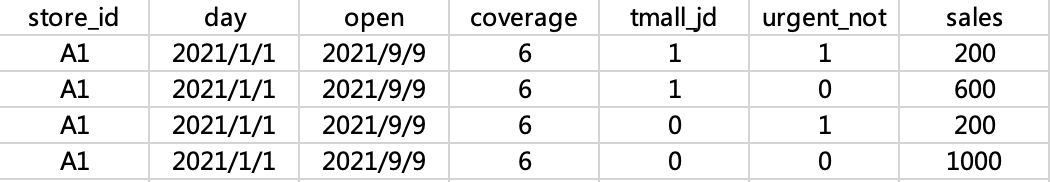
数据：【day】231*4*520【店铺数】=480480

### DID

In [ ]:
# 读取数据
data = pd.read_csv('data.csv')

# 创建虚拟变量
data['treatment'] = 0
data.loc[data['post'] == 1, 'treatment'] = 1

# DID 模型
model = sm.formula.ols('outcome ~ treatment*post', data=data).fit()

# 输出结果
print(model.summary())

In [ ]:
##平行趋势假设检验
import pandas as pd
import statsmodels.api as sm

# 读取数据
data = pd.read_csv('data.csv')

# 进行趋势回归
model = sm.formula.ols('outcome ~ treatment + time*treatment', data=data[data['time'] < 0]).fit()
print(model.summary())

#### 代码测试

In [ ]:
dt = [
    [55, 'A', '2023-01-05', '2023-01-01'],
    [22, 'B', '2023-01-06', '2023-01-02'],
    [55, 'A', '2023-01-05', '2023-01-06'],
    [22, 'B', '2023-01-06', '2023-01-07']
]
dt = pd.DataFrame(dt, columns=['订购金额', '店铺', '店铺开设时间', '订单时间'])

In [ ]:
dt

In [ ]:
test = dt.groupby(['店铺'])['订购金额'].sum()

In [ ]:
test = pd.DataFrame(test.reset_index())
test = test.set_index('店铺')

In [ ]:
test['new']=test['订购金额']/test['订购金额']

---

In [ ]:
### PART3 计量比较前后是否存在显著性降低
##未知两组数据的总体方差
# 计算t检验统计量和p值
t_statistic, p_value = stats.ttest_ind(before_open_sum['average'], after_open_sum['average']) ##【还需要处理增速后】增速怎么处理【【【【【

alpha = 0.05  # 显著性水平

if p_value < alpha:
    print("p值为", p_value, "，小于显著性水平", alpha, "，两组数据差异显著。")
else:
    print("p值为", p_value, "，大于显著性水平", alpha, "，两组数据差异不显著。")

In [ ]:
##############################PART1
##文件处理


import pandas as pd

# 指定要合并的Excel文件路径
excel_file = '/Users/lesliedeng/Desktop/毕设/rawdata/天猫2019-2022.10.25明细数据.xlsx'

# 指定要合并的Sheet名称列表
sheet_names = ['天猫2021.1-3', '天猫2021.4-6', '天猫2021.7-9']

# 读取指定的Sheet并合并为一个DataFrame
df = pd.concat(pd.read_excel(excel_file, sheet_name=sheet_names), ignore_index=True)

# 删除退货单号
df = df[~df['出货单号'].str.startswith('KTX')]


In [ ]:
import pandas as pd

# 指定要合并的Excel文件路径
excel_file = '/Users/lesliedeng/Desktop/毕设/rawdata/京东2019-2022.10.25明细数据_商品.xlsx'

# 指定要合并的Sheet名称列表
sheet_names = ['京东2021.1-3', '京东2021.4-6', '京东2021.7-9']

# 读取指定的Sheet并合并为一个DataFrame
df = pd.concat(pd.read_excel(excel_file, sheet_name=sheet_names), ignore_index=True)

# 删除退货单号
df = df[~df['出货单号'].str.startswith('KTX')]

In [ ]:
# 删除"单位"和"规格"列
df = df.drop(['单位', '规格'], axis=1)

# 重设索引
df = df.reset_index(drop=True)

In [ ]:
# 将DataFrame保存为CSV文件
df.to_csv('全国京东202101_09订单.csv', index=False)

In [ ]:
df=pd.read_csv('全国天猫202101_09订单.csv')
#天猫字典

unique_values = df[['商品名称','商品编号']].drop_duplicates()

# 将DataFrame对象保存为Excel文件
unique_values.to_excel('药品类字典_天猫_debug.xlsx', index=False)

In [ ]:
#合并文件
import os

# 设置要合并的Excel文件的路径
folder_path = "/Users/lesliedeng/Desktop/毕设/code"

# 获取文件夹中所有Excel文件的文件名
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') and f.startswith('昆明天猫')]

# 创建一个空的DataFrame来存储所有数据
combined_data = pd.DataFrame()

# 循环遍历每个Excel文件并将其添加到combined_data
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    sheet_name = "Sheet1" # 设置要读取的工作表名称
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    combined_data = combined_data.append(data, ignore_index=True)

# 将合并后的数据保存为CSV文件
combined_data.to_csv("昆明天猫合并.csv", index=False)

In [ ]:
testtest = pd.read_csv("全国天猫202101_09订单.csv")

In [ ]:
testtest2 = pd.read_csv("昆明天猫合并.csv")

In [ ]:
# 统计某一列的数据
column_name = "数量"
column_data = testtest[column_name]
column_count = column_data.count() # 统计非空值的数量
column_mean = column_data.mean() # 计算平均值
column_std = column_data.std() # 计算标准差
column_min = column_data.min() # 计算最小值
column_max = column_data.max() # 计算最大值

# 打印统计结果
print("Non-null count:", column_count)
print("Mean:", column_mean)
print("Standard deviation:", column_std)
print("Minimum value:", column_min)
print("Maximum value:", column_max)

In [ ]:
rows_with_3700 = testtest[testtest['数量'] == -2400]
print(rows_with_3700.head(10)) # 显示前10行

In [ ]:
# 将两个表格按照出货单号进行合并
df_merged = pd.merge(testtest, testtest2, on='出货单号')

# 输出合并后的结果
print(df_merged)

In [ ]:
unique_values = df_merged['商品名称'].unique()

# 将numpy数组转换为pandas DataFrame对象
df = pd.DataFrame(unique_values)

# 将DataFrame对象保存为Excel文件
df.to_excel('药品类字典.xlsx', index=False)

In [ ]:
unique_values

---
# 京东
---

## 数据处理与切分

In [ ]:
# 打开Excel文件
wb = openpyxl.load_workbook('/Users/lesliedeng/Desktop/毕设/code/finaldata/jd_delivery_use_not2021_1.xlsx') 

# 选择Sheet表
sheet = wb['Sheet1'] 

column1 = sheet['j'] # 提取创建收货地址数据
column2 = sheet['s'] # 提取金额列数据
column3= sheet['b'] # 提取时间列
column4= sheet['a'] # 提取出货单号


# 创建空列表
jd_delivery = []
jd_pay = []
jd_time = []
jd_id = []

# 迭代column对象,将单元格数据添加到列表中
for cell in column1[1:]:
    jd_delivery.append(cell.value)
for cell in column2[1:]:
    jd_pay.append(cell.value)
for cell in column3[1:]:
    jd_time.append(cell.value)
for cell in column4[1:]:
    jd_id.append(cell.value)

In [ ]:
jd_deliverycode = pd.DataFrame()

# 循环遍历经纬度数据，并将它们添加到 DataFrame 中
for i in range(len(jd_delivery)):
    jd_deliverycode.loc[i, 'jd_delivery'] = jd_delivery[i]
    jd_deliverycode.loc[i, 'jd_pay'] = jd_pay[i]
    jd_deliverycode.loc[i, 'jd_time'] = jd_time[i]
    jd_deliverycode.loc[i, 'jd_id'] = jd_id[i]

In [ ]:
jd_deliverycode.to_excel('jd_deliverycode.xlsx', index=False)

In [ ]:
# 加载 Excel 文件
workbook = load_workbook(filename='jd_deliverycode.xlsx')

# 获取工作表
worksheet = workbook.active

# 遍历单元格
for row in worksheet.iter_rows():
    cell = row[0]  #注意列
    if cell.value:
        # 删除指定字符串内容
        cell.value = cell.value.replace('云南省昆明市宜良县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市寻甸回族彝族自治县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市西山区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市五华区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市嵩明县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市石林彝族自治县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市盘龙区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市禄劝彝族苗族自治县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市晋宁区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市官渡区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市富民县云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市东川区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市呈贡区云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市安宁市云南', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市西山区云南昆明市西山区滇池度假区', ' ').replace('', '')
        cell.value = cell.value.replace('云南省昆明市禄劝彝族苗族自治县云南昆明市', ' ').replace('', '')
        cell.value = cell.value.replace('省', ' ').replace('', '')
        cell.value = re.sub(r'，.*', '', cell.value)
    match = re.search(r'[\u4e00-\u9fa5]*（[^（）]*）', cell.value)
    if match:
        # 删除括号和括号中的字符
        cell.value = re.sub(r'（[^（）]*）', '', cell.value)

# 保存 Excel 文件
workbook.save(filename='jd_deliverycode_use.xlsx')
workbook.close()

In [ ]:
## 读取销售数据文件
import openpyxl

# 打开Excel文件
wb = openpyxl.load_workbook('/Users/lesliedeng/Desktop/毕设/code/finaldata/jd_delivery_use_4.xlsx') ###注意更换

# 选择Sheet表
worksheet = wb['Sheet1'] 

worksheet['E1'] = 'longitude'
worksheet['F1'] = 'latitude'
worksheet['G1'] = 'comprehension'
worksheet['H1'] = 'confidence'

In [ ]:
pd.DataFrame(worksheet.values)

In [ ]:
worksheet.max_column

In [ ]:
# 获取要删除的列的范围
start_column = 7
end_column = worksheet.max_column

# 删除指定范围的列
for column in range(start_column, end_column + 1): #range左闭右开
    worksheet.delete_cols(column)

In [ ]:
# 百度地图API密钥
ak = 'AOAM2zC7CBsq2dGpdSMjtCtuGWn2F0rd'
#'eWMineUOS3dzbfOCHBqtclfn81hnyqZ7' 已用180
#'Kadu7cjY7eFAofC5zi5EOaYWR9GDv8LC'

for row in range(194, worksheet.max_row + 1):
    delivery_place = worksheet.cell(row=row, column=1).value
    
    # 构建请求URL
    url = f'https://api.map.baidu.com/geocoding/v3/?address={delivery_place}&output=json&ak={ak}'

    # 发送请求并获取响应
    response = requests.get(url)
    data = response.json()

    # 从响应中提取经纬度
    location = data['result']['location']
    worksheet.cell(row=row, column=5).value = location['lng']     # 经度
    worksheet.cell(row=row, column=6).value = location['lat']     # 纬度
    worksheet.cell(row=row, column=7).value = data['result']['comprehension'] #理解度
    worksheet.cell(row=row, column=8).value = data['result']['confidence'] #绝对精度 https://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding

# 保存 Excel 文件
df = pd.DataFrame(worksheet.values)
df.to_excel('deliverycode_jd_not2021_1.xlsx', index=False) ##记得改名字

In [ ]:
delivery_place

In [ ]:
jd_df1 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_jd_1.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','jd_time','jd_pay'])
jd_df2 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/deliverycode_jd_2.xlsx', usecols=['longitude', 'latitude', 'comprehension','confidence','jd_time','jd_pay'])

jd_merged_df = pd.concat([jd_df1, jd_df2],ignore_index=True)
print(jd_merged_df)

In [ ]:
# 读取店铺经纬度数据
stores = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/finaldata/店铺地址与时间2021.xlsx')

# 读取订单经纬度数据
jd_orders = jd_merged_df

# 构建 KD 树
tree = cKDTree(stores[['latitude', 'longitude']].values)

# 查找每个订单最近的店铺距离和索引，最近的一个：k=1
distances, indices = tree.query(jd_orders[['latitude', 'longitude']].values, k=1)

# 将距离小于等于5公里的订单归类为相应的店铺
jd_orders['store_id'] = np.nan
jd_orders.loc[distances <= 5, 'store_id'] = stores.loc[indices[distances <= 5], 'store_id'].values
jd_orders.to_csv('orders_jd_all_with_store.csv',index = False)

In [ ]:
jd_merged_data = pd.merge(jd_orders, stores[['store_id', 'setup_time']], on='store_id', how='left')
print(jd_merged_data)

In [ ]:
jd_merged_data['jd_time'] = pd.to_datetime(jd_merged_data['jd_time'])
jd_merged_data['setup_time'] = pd.to_datetime(jd_merged_data['setup_time'])
jd_merged_data['出货_week_number'] = jd_merged_data['jd_time'].dt.isocalendar().week
jd_merged_data['setup_time_week_number'] = jd_merged_data['setup_time'].dt.isocalendar().week
print(jd_merged_data)
jd_merged_data.to_csv('orders_jd_week_number.csv',index = False)

In [ ]:
jd_orders_by_date = jd_merged_data.groupby(['store_id','出货_week_number']).agg({'jd_pay': 'sum'})
jd_orders_by_date = jd_orders_by_date.reset_index()
jd_orders_by_date.to_csv('orders_by_week.csv', index=False)
print(jd_orders_by_date)

## 平台和药品敏感性

In [ ]:
regtest = pd.read_excel('回归测试二三模型raw.xlsx')
regtest

In [ ]:
# 准备数据

X = regtest[['OPEN', 'overlap','出货_month_number_1','出货_month_number_2','出货_month_number_3','出货_month_number_4','出货_month_number_5','出货_month_number_6','出货_month_number_7','出货_month_number_8']]
y = regtest['sales']

# 添加常数列
X = sm.add_constant(X)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出系数表
print(model.summary().tables[1])

$$
\text{成绩}{it} = \alpha + \beta_1 \text{政策后}{it} + \beta_2 \text{处理组}{i} + \gamma_t + \epsilon{it}
$$

## 品类敏感性

In [ ]:
import pandas as pd
import glob

# 获取所有xlsx文件的文件路径
file_paths = glob.glob('/Users/lesliedeng/Desktop/毕设/code/地址/*.xlsx')  # 将'path/to/files/'替换为包含xlsx文件的文件夹路径

# 创建一个空的DataFrame来存储合并后的数据
merged_data = pd.DataFrame()

# 循环遍历文件路径
for file_path in file_paths:
    # 读取Excel文件内容
    df = pd.read_excel(file_path)
    
    # 将读取的数据添加到合并后的DataFrame中
    merged_data = merged_data.append(df, ignore_index=True)

# 将合并后的数据保存到新的Excel文件中
merged_data.to_excel('/Users/lesliedeng/Desktop/毕设/code/地址/tm_raw地址_merged.xlsx', index=False)  # 将'path/to/merged_file.xlsx'替换为合并后的文件路径

In [ ]:
tmall_delivery_all = pd.read_csv('/Users/lesliedeng/Desktop/毕设/code/地址/tmall_delivery_all.csv') 

In [ ]:
tmall_delivery_all['出货日期'] = pd.to_datetime(tmall_delivery_all['出货日期'])
merged_data['出货日期'] = pd.to_datetime(merged_data['出货日期'])

In [ ]:
# 进行匹配操作
merged_df = pd.merge(merged_data, tmall_delivery_all, on=['出货日期', '订购金额'], how='outer')

In [ ]:
# merged_df.to_csv("带文本的经纬与金额.csv")

In [ ]:
tm_df = pd.read_excel('tm带文本的经纬与金额.xlsx')

In [ ]:
#天猫字典

unique_values = df_merged['商品名称'].unique()

# 将numpy数组转换为pandas DataFrame对象
df = pd.DataFrame(unique_values)

# 将DataFrame对象保存为Excel文件
df.to_excel('药品类字典.xlsx', index=False)

In [ ]:
##生成数据集
df_tm_pre = pd.read_csv("全国天猫202101_09订单.csv")
df_drug = pd.read_csv("/Users/lesliedeng/Desktop/毕设/code/药品分类/药品分类.csv")
df_drug_no = pd.read_csv("/Users/lesliedeng/Desktop/毕设/code/药品分类/matched_drug_tm.csv")

In [ ]:
df_merged = pd.merge(df_drug, df_drug_no[["Matched Drug", "number"]], left_on="name", right_on="Matched Drug", how="left")
df_merged = df_merged.drop_duplicates()
df_merged

In [ ]:
#nan_rows = df_merged[df_merged["Matched Drug"].isna()]
#print(nan_rows)

In [ ]:
df_merged2 = pd.merge(df_tm_pre, df_merged[["number", "name","otc0","otc1","otc2","cata","standard"]], left_on="商品编号", right_on="number", how="left")
df_merged2

In [ ]:
location = pd.read_excel("/Users/lesliedeng/Desktop/毕设/code/回归/orders_tmall带文本的经纬与金额_24266.xlsx")
location

In [ ]:
df_merged3 = pd.merge(df_merged2, location[['出货单号', 'longitude', 'latitude', 'comprehension', 'confidence']], on='出货单号',how='left')
df_merged3

In [ ]:
### 通过这种方式删除不是昆明的订单，因为明细数据里面没有地理位置，只有配送的表中有地理位置
df_merged3 = df_merged3.dropna(subset=['longitude'])
df_merged3

In [ ]:
df_merged3.to_csv('all_df_cata_tm.csv', index=False)

# 索引筛选出name列中number为NaN的行
nan_name_rows = df_merged3[df_merged3['number'].isna()]
nan_name_rows.to_csv('tm_all_df_cata_notmedicine.csv', index=False)

name_rows = df_merged3[df_merged3['number'].notna()]
name_rows.to_csv('tm_all_df_cata_medicine.csv', index=False)

In [ ]:
df_sheet2 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/药品分类回归及数据处理.xlsx', sheet_name='Sheet2')

df_sheet4 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/药品分类回归及数据处理.xlsx', sheet_name='Sheet4')

# 提取关键词列表
keywords = df_sheet4["type"].tolist()

# 定义一个函数，用于从字符串中提取关键词
def extract_keywords(text):
    extracted_keywords = []
    for keyword in keywords:
        if keyword in text:
            extracted_keywords.append(keyword)
    return extracted_keywords

# 在文件1中的字符数据中提取关键词并保存在新列中
df_sheet2['Extracted Keywords'] = df_sheet2['cata'].apply(extract_keywords)

In [ ]:
df_sheet2.to_csv('国家医保版药品分类.csv', index=False)

In [ ]:
df_sheet1 = pd.read_csv('/Users/lesliedeng/Desktop/毕设/code/tm_all_df_cata_medicine.csv')
nationcata = pd.read_csv('国家医保版药品分类.csv')

In [ ]:
df_merged_nation = pd.merge(df_sheet1, nationcata[['name', 'national cata']], on='name', how='left')

df_merged_nation = df_merged_nation.drop(['商品名称', '备注', 'cata', 'standard'], axis=1)
df_merged_nation

In [ ]:
df_merged_nation['amount']=df_merged_nation['单价']*df_merged_nation['数量']

In [ ]:
df_merged_nation.to_excel('tm_昆明销售按类别带地理.xlsx', index=False)

# 药品名称提取 分类清洗

In [ ]:
import pandas as pd
import csv

# 读取 Excel 文件
excel_file = pd.ExcelFile('/Users/lesliedeng/Desktop/毕设/rawdata/京东2019-2022.10.25明细数据.xlsx') #注意区分天猫和京东

# 遍历每个表格
all_unique_values = set()  # 用于保存所有非重复值的集合

for sheet_name in excel_file.sheet_names:
    # 读取每个表格
    df = excel_file.parse(sheet_name)
    
    # 提取某一列数据
    column_data = df['商品名称']
    
    # 去除重复值，并添加到集合中
    unique_values = set(column_data.drop_duplicates())
    all_unique_values.update(unique_values)

In [ ]:
len(all_unique_values)

In [ ]:
# 将非重复值保存到 CSV 文件
with open('未清洗_京东唯一药品名.csv', 'w', newline='') as csvfile: #注意区分天猫和京东
    writer = csv.writer(csvfile)
    writer.writerow(['未清洗名'])  # 写入表头
    
    for value in all_unique_values:
        writer.writerow([value])

In [ ]:
import csv
import requests

def translate_text(text, source_lang, target_lang, api_key):
    url = 'https://fanyi-api.baidu.com/api/trans/vip/translate'
    params = {
        'q': text,
        'from': source_lang,
        'to': target_lang,
        'appid': api_key,
        'salt': '123456',  # 随机数
    }
    response = requests.get(url, params=params)
    result = response.json()
    translated_text = result['trans_result'][0]['dst']
    return translated_text


        
# 设置API密钥和语言参数
api_key = '20211222001035177'
source_lang = 'auto'  # 自动检测源语言
target_lang = 'en'  # 目标语言，此处为英语

In [ ]:
import csv
import requests
import json
import random
import hashlib

# 百度翻译API的URL
BAIDU_TRANSLATE_API_URL = 'http://api.fanyi.baidu.com/api/trans/vip/translate'

# 你的APP ID和密钥
APP_ID = '20211222001035177'
SECRET_KEY = '_e3LvzNY3M1LFxGFLYV6'

def translate_baidu(text, from_lang='auto', to_lang='en'):
    salt = random.randint(32768, 65536)
    sign = APP_ID + text + str(salt) + SECRET_KEY
    sign = hashlib.md5(sign.encode()).hexdigest()

    params = {
        'q': text,
        'from': from_lang,
        'to': to_lang,
        'appid': APP_ID,
        'salt': salt,
        'sign': sign,
    }

    response = requests.post(BAIDU_TRANSLATE_API_URL, data=params)
    result = json.loads(response.text)
    
    if 'trans_result' in result and len(result['trans_result']) > 0:
        return result['trans_result'][0]['dst']
    else:
        raise Exception('Translation failed.')
        

def translate_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file)
        rows = list(reader)
        header = rows[0]
        header.append('Translated Text')

        translated_rows = []
        translated_rows.append(header)

        for row in rows[1:]:
            text = row[0]
            translated_text = translate_baidu(text)
            row.append(translated_text)
            translated_rows.append(row)

    with open(output_file, 'w', encoding='utf-8', newline='') as output_csv:
        writer = csv.writer(output_csv)
        writer.writerows(translated_rows)

In [ ]:
# 调用函数进行翻译
translate_csv('药物分类爬虫补充列表.csv', 'translate_2.csv')

In [ ]:
pattern = r'\b(' + '|'.join(map(re.escape, drug_list['Drug'].tolist())) + r')\b'
matchdf['Matched Drug'] = matchdf['Text'].str.extract(pattern, flags=re.IGNORECASE)

In [ ]:
# 读取翻译的文件
atc_cata = pd.read_csv('药物分类爬虫补充列表.csv')

In [ ]:
import requests
import json

def query_plain(text, url="http://bern2.korea.ac.kr/plain"):
    return requests.post(url, json={'text': text}).json()

for text in atc_cata['eng'][1:5]:
    data = json.loads(query_plain(text))
    atc_cata['atc_cata'] = data['annotations']['mention']
    atc_cata['atc_obj'] = data['annotations']['obj']
    atc_cata['atc_prob'] = data['annotations']['prob']

atc_cata

In [ ]:
query_plain(text)

## 数据匹配

In [ ]:
# 读取CSV文件
with open('药品类字典_天猫.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    rows = list(reader)

# 处理行数据
for i in range(1,len(rows)):
    match = re.search(r'[\u4e00-\u9fff]', rows[i][0])  # 查找第一个中文字符
    if match:
        index = match.start()  # 中文字符的索引位置
        rows[i][0] = rows[i][0][:index] + ',' + rows[i][0][index:]

# 写入更新后的CSV文件
with open('未匹配商品名_天猫.csv', 'w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
import pandas as pd
import numpy as np
import re

# 加载原始数据 
#！！！！！！！！千万不要动数据顺序，因为前面对名称进行了逗号编辑
matchdf = pd.read_csv('未匹配商品名_天猫.csv') #未清洗商品名.csv 京东

# 加载已有药品列表
drug_list = pd.read_csv('药品编码.csv')

In [ ]:
pattern = r'\b(' + '|'.join(map(re.escape, drug_list['Drug'].tolist())) + r')\b'
matchdf['Matched Drug'] = matchdf['Text'].str.extract(pattern, flags=re.IGNORECASE)

In [ ]:
matchdf.to_csv('matched_drug_tm.csv', index=False)

## 爬取类别数据

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import time
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36',
    'Referer': 'https://www.google.com/'
}

In [ ]:
otcdf = pd.DataFrame(columns=["name", "otc0", "otc1", "otc2"])

# OTC判断 一共有两个文件
with open('/Users/lesliedeng/Desktop/毕设/code/otc_raw2.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    reader = list(reader)
    # 遍历每一行
    for row in reader[1286:]:
        # 获取字符串
        string = row[0]
        # 生成URL
        url = f'https://db.yaozh.com/otc?name={string}&type=&sort=&notice='
        response = requests.get(url, headers=headers)
        html_code = response.text
        soup = BeautifulSoup(html_code,'html.parser')
        
        time.sleep(3)
        
        # 初始化变量值
        otc0 = 0
        otc1 = 0
        otc2 = 0
    
        cell = soup.find(text="甲类")
        cell2 = soup.find(text="乙类")
        
        if cell:
            otc1 = 1
        if cell2:
            otc2 = 1
        if cell == None and cell2 == None:
            otc0 = 1

        #储存在df中
        otcdf = pd.concat([otcdf, pd.DataFrame({"name": [string], "otc0": [otc0], "otc1": [otc1], "otc2": [otc2]})], ignore_index=True)

In [ ]:
otcdf

In [ ]:
otcdf.to_csv('otcdf2_2.csv', index=False)

In [ ]:
# 药品医保分类
catadf = pd.DataFrame(columns=["name", "cata","standard"])

with open('/Users/lesliedeng/Desktop/毕设/code/otc_raw2.csv', 'r', encoding='utf-8') as file: ##在这里直接otc_raw就是raw文件
    reader = csv.reader(file)
    reader = list(reader)
    # 遍历每一行
    for row in reader[1:]:
        # 获取字符串
        string = row[0]
        # 生成URL
        url = f'https://db.yaozh.com/yibao?comprehensivesearchcontent={string}&'
        response = requests.get(url, headers=headers)
        html_code = response.text
        soup = BeautifulSoup(html_code,'html.parser')
        
        time.sleep(2)
        
        tbody_element = soup.find("tbody")
        if tbody_element:
            rows = tbody_element.find("tr")
            #row_soup = BeautifulSoup(str(rows), "html.parser")
            th_content = rows.find("th").get_text(strip=True)
            td_content = rows.find_all("td")[4].get_text(strip=True)
        else:
            th_content = "na"
            td_content = "na"

        #储存在df中
        catadf = pd.concat([catadf, pd.DataFrame({"name": [string], "standard": [th_content], "cata": [td_content]})], ignore_index=True)

In [ ]:
catadf

In [ ]:
catadf.to_csv('catadf2.csv', index=False)

In [ ]:
drug_category

# 描述统计 可视化

In [ ]:
import altair as alt
import bokeh
import seaborn

In [ ]:
jd_df = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/jd_昆明销售按类别带地理.xlsx')

In [ ]:
# 按照'national cata'列进行分组并求'amount'列的总和
grouped = jd_df.groupby('national cata')['amount'].sum().reset_index()

# 统计各'national cata'出现的次数（即每组的大小）
count_df = jd_df['national cata'].value_counts().reset_index()
count_df.columns = ['national cata', 'counts']

# 若要合并这两份结果，可以使用merge
result = pd.merge(grouped, count_df, on='national cata', how='left')
result['average price'] = result['amount'] / result['counts']
result

In [ ]:
alt.Chart(result).mark_circle().encode(
    alt.X('counts'),
    alt.Y('average price'),
    size='amount',
    tooltip='national cata'
).mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # 调整文本的垂直位置
    fontSize=10,  # 调整文本的字体大小
    text=alt.Text('amount:Q')
)

In [ ]:
from vega_datasets import data

source = data.gapminder_health_income.url
source

In [ ]:
#处理店铺间距离 FOR DID
df=pd.read_excel('/Users/lesliedeng/Desktop/毕设/rawdata/昆明门店开通O2O时间.xlsx')

from haversine import haversine, Unit

def distance(lat1, lon1, lat2, lon2):
    return haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)


# 创建一个空的DataFrame来存储距离矩阵
distance_matrix = pd.DataFrame(columns=df['store_id'], index=df['store_id'])

for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        # 计算距离并填入矩阵
        dist = distance(row_i['latitude'], row_i['longitude'], row_j['latitude'], row_j['longitude'])
        distance_matrix.at[row_i['store_id'], row_j['store_id']] = dist

# 对于对称的距离矩阵，需要填充对角线以及对角线上方的部分
distance_matrix += distance_matrix.T
distance_matrix.fillna(0, inplace=True)

In [ ]:
distance_matrix.to_csv('distance_matrix.csv')

In [ ]:
# 找出距离小于3千米的配对（不包括自身）
close_pairs = []
for i in distance_matrix.index:
    for j in distance_matrix.columns:
        if i != j and distance_matrix.loc[i, j] <= 3:
            close_pairs.append((i, j, distance_matrix.loc[i, j]))

# 将配对信息整理为DataFrame
close_pairs_df = pd.DataFrame(close_pairs, columns=['ShopID_1', 'ShopID_2', 'Distance(Km)'])
close_pairs_df

In [ ]:
distance_matrix

In [ ]:
close_pairs_df.to_csv('close_pairs_df.csv')

In [ ]:
distance_matrix=pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/回归/did/distance_matrix_open_unopen.xlsx', sheet_name='Sheet1',index_col='store_id')

In [ ]:
distance_matrix

In [ ]:
distance_matrix.index

In [ ]:
# 首先确保所有的距离值都是正数（因为距离不能为负），然后将df转换为布尔型 DataFrame
distance_matrix_1 = distance_matrix > 5  # 所有距离大于5km的位置为True

# 对于每一列（未开通服务的店铺），检查其所有行（已开通服务的店铺）是否都满足条件（距离大于5km）
all_above_threshold = distance_matrix_1.all(axis=0)

# 提取出满足条件的店铺名
unopened_stores_far_away = all_above_threshold[all_above_threshold].index.tolist()

print("与所有开通服务店铺距离均大于5km的未开通服务店铺名单：", unopened_stores_far_away)

In [ ]:
# 设置距离阈值为5km
distance_threshold = 5

# 创建一个空的DataFrame来存储结果，这里我们使用distance_matrix的行名和列名
results = pd.DataFrame(distance_matrix.index, index=distance_matrix.index, columns=distance_matrix.columns)

# 遍历矩阵中的每个元素
for row_name in distance_matrix.index:
    for col_name in distance_matrix.columns:
        if distance_matrix.at[row_name, col_name] < distance_threshold:
            results.at[row_name, col_name] = '小于5km'

# 打印结果
results

In [ ]:
results.to_csv('open_unopen_matrix5km.csv')